In [57]:
import pandas as pd
import numpy as np
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
#https://drive.google.com/file/d/1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 46.6MB/s]


In [58]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|purchase history of Fresh food|
|**Milk**|purchase history of milk product|
|**Grocery**|purchase history of Grocery|
|**Frozen**|purchase history of Frozen food|
|**Detergents_Paper**|purchase history of washing products|
|**Delicassen**|purchase history of imported products, cooked meat|
|**class**|Store catgeory based on demand on products|





In [59]:
df['class'].value_counts()

2    180
3    173
1     87
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='Count'>

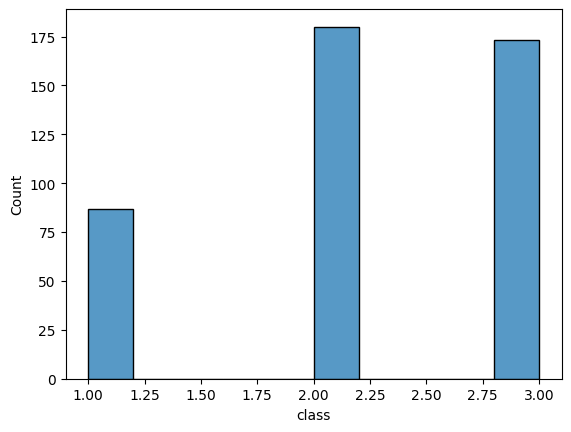

In [60]:
import seaborn as sns
sns.histplot(data=df, x="class")

In [61]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']].copy().to_numpy()
y=df[['class']].copy().to_numpy()

In [62]:
X.shape

(440, 7)

In [63]:
y.shape

(440, 1)

In [65]:
from sklearn.decomposition import PCA # principal component analysis
import matplotlib.pyplot as plt

# reducing features to just 2 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(440, 2)

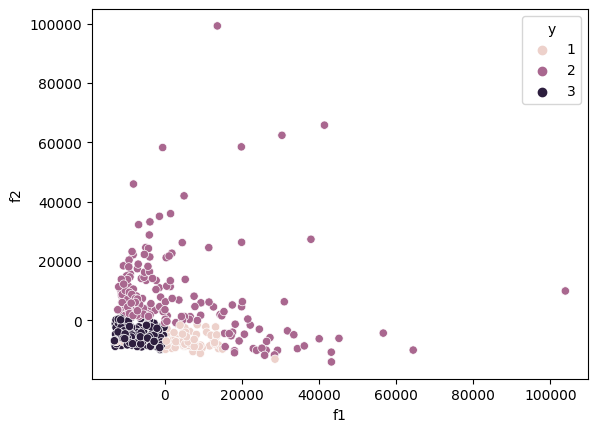

In [66]:
df2 = pd.DataFrame(X_pca,columns=['f1','f2'])
df2['y'] = y
sns.scatterplot(data=df2, x='f1', y='f2', hue='y')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,\
                                                            test_size=0.25,random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,\
                                                            test_size=0.25,random_state=0)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [68]:
print(np.unique(y_train,return_counts=True))

(array([1, 2, 3]), array([ 47, 106,  94]))


In [69]:
# standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [71]:
# implement kNN from scratch

def kNN(X,Y,query_point,K=5): # X is N x d matrix, query_point is 1 x d array
  N = X.shape[0]
  d = X.shape[1]

  # store the euclidean distance and the labels together
  #dist_labels = np.array([[np.sqrt(np.sum((query_point - X[i])**2)),Y[i][0]] for i in range(N)])
  dist_labels = [(np.sqrt(np.sum((query_point - X[i])**2)),Y[i][0]) for i in range(N)]
  #print(dist_labels.shape)

  # sort the distances and labels together
  #dist_labels = dist_labels[dist_labels[:,0].argsort()]
  dist_labels = np.array(sorted(dist_labels, key=lambda x:x[0]))
  #print(dist_labels[:5,])

  # choose the top K distance and labels
  dist_labels_topK = dist_labels[:K,:]

  labels, counts = np.unique(dist_labels_topK[:,1],return_counts=True)

  index_maxcount = np.argmax(counts)
  pred_label = labels[index_maxcount]
  return int(pred_label)

In [72]:
kNN(X_train,y_train,X_test[50],5)

3

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_test = np.zeros((X_test.shape[0],1))

for i in range(X_test.shape[0]):
  y_pred_test[i][0] = kNN(X_train, y_train, X_test[i], K=5)

target_names = ['class 1','class 2','class 3']
print("Performance on test data")
print(classification_report(y_test, y_pred_test, target_names=target_names, digits=2))


y_pred_train = np.zeros((X_train.shape[0],1))

for i in range(X_train.shape[0]):
  y_pred_train[i][0] = kNN(X_train, y_train, X_train[i], K=5)

target_names = ['class 1','class 2','class 3']
print("\nPerformance on train data")
print(classification_report(y_train, y_pred_train, target_names=target_names, digits=2))

Performance on test data
              precision    recall  f1-score   support

     class 1       0.76      0.64      0.70        25
     class 2       0.88      0.88      0.88        42
     class 3       0.81      0.88      0.84        43

    accuracy                           0.83       110
   macro avg       0.82      0.80      0.81       110
weighted avg       0.83      0.83      0.82       110


Performance on train data
              precision    recall  f1-score   support

     class 1       0.85      0.83      0.84        47
     class 2       0.96      0.92      0.94       106
     class 3       0.95      1.00      0.97        94

    accuracy                           0.94       247
   macro avg       0.92      0.92      0.92       247
weighted avg       0.93      0.94      0.93       247



<Figure size 1600x1600 with 0 Axes>

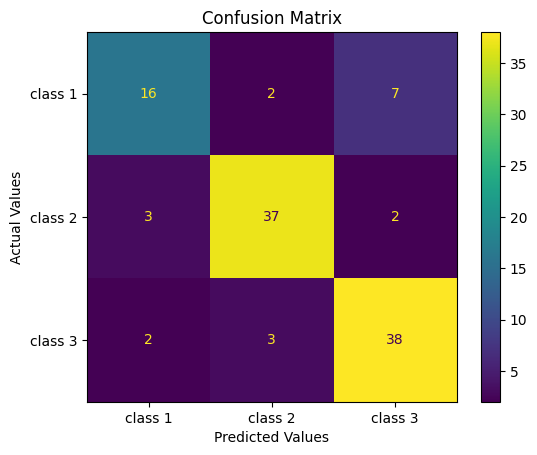

In [74]:
cm = confusion_matrix(y_test, y_pred_test)

#Plotting the confusion matrix
plt.figure(figsize=(16,16))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [75]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [104]:
knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn.fit(X_train, y_train.ravel()) # (400,1) --> (400,)
y_pred_test2 = knn.predict(X_test)
#knn.score(X_test, y_test)
print("\nPerformance on test data")
print(classification_report(y_test, y_pred_test2, target_names=target_names, digits=2))

y_pred_train2 = knn.predict(X_train)
print("\nPerformance on train data")
print(classification_report(y_train, y_pred_train2, target_names=target_names, digits=2))


Performance on test data
              precision    recall  f1-score   support

     class 1       0.74      0.80      0.77        25
     class 2       0.90      0.90      0.90        42
     class 3       0.88      0.84      0.86        43

    accuracy                           0.85       110
   macro avg       0.84      0.85      0.84       110
weighted avg       0.86      0.85      0.86       110


Performance on train data
              precision    recall  f1-score   support

     class 1       0.79      0.89      0.84        47
     class 2       0.97      0.87      0.92       106
     class 3       0.95      1.00      0.97        94

    accuracy                           0.92       247
   macro avg       0.90      0.92      0.91       247
weighted avg       0.93      0.92      0.92       247



<Figure size 1600x1600 with 0 Axes>

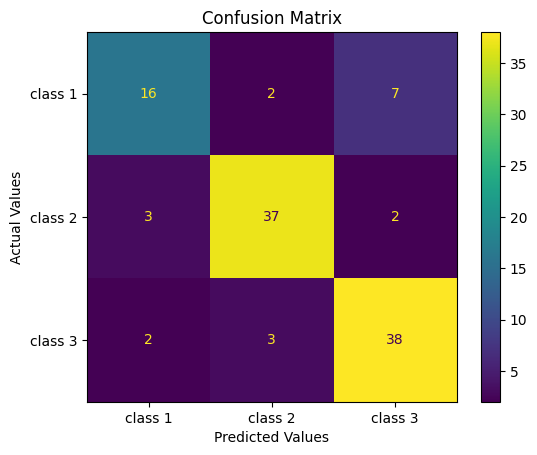

In [77]:
cm = confusion_matrix(y_test, y_pred_test)

#Plotting the confusion matrix
plt.figure(figsize=(16,16))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [83]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
#https://drive.google.com/file/d/1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 35.1MB/s]


In [88]:
df_imp=pd.read_csv('knn_imputation.csv')

In [89]:
df_imp.shape

(267, 8)

In [90]:
df_imp.head()

,Unnamed: 0,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [91]:
df_imp.drop(['Unnamed: 0'],axis=1,inplace=True)
df_imp.isna().sum()

Region               8
Fresh               13
Milk                15
Grocery              9
Frozen               8
Detergents_Paper    10
Delicassen          11
dtype: int64

In [92]:
df_imp.shape

(267, 7)

In [94]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler = MinMaxScaler()
df_imp = pd.DataFrame(scaler.fit_transform(df_imp), columns = df_imp.columns)
df_imp.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,0.112821,0.129791,0.081464,0.003106,0.065427,0.027847
1,1.0,0.062774,0.131890,0.103097,0.028548,0.080590,0.036984
2,1.0,0.056495,0.118232,NaN,0.039116,0.086052,0.163559
3,1.0,0.118136,0.014476,0.045464,0.104842,0.012346,0.037234
4,1.0,0.201520,0.071915,0.077552,0.063934,0.043455,0.108093


In [96]:
imputer = KNNImputer(n_neighbors=5)
df_imp = pd.DataFrame(imputer.fit_transform(df_imp),columns = df_imp.columns)

In [97]:
df_imp.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,0.112821,0.129791,0.081464,0.003106,0.065427,0.027847
1,1.0,0.062774,0.131890,0.103097,0.028548,0.080590,0.036984
2,1.0,0.056495,0.118232,0.114492,0.039116,0.086052,0.163559
3,1.0,0.118136,0.014476,0.045464,0.104842,0.012346,0.037234
4,1.0,0.201520,0.071915,0.077552,0.063934,0.043455,0.108093


In [98]:
df_imp.isna().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

## UseCase Intro: Employee Attrition
## You are a Data Scientist working at a Jio

- The company is facing a huge problem of employee attrition
- Your task is to help the company find a solution to this problem.

#### Why is attrition a problem?

  - A new employee asks for more compensation
  - Training of new employees
  - Lots of time and resources required for searching a new candidate

#### What can be done to solve the problem ?

1. Identify the employees who may leave in future.
  - Targeted approaches can be undertaken to retain such employees.
  - These might include addressing their problems with the company and so on ...

2. Help identify the key indicators/factors leading to an employee leaving.
  - #### What all reasons can you think of contributing to attrition ?
    - Forcing employees to come to office daily
    - Unhealthy culture etc
  - Identifying these key factors helps in taking better measures to improve employee retention



In [99]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 125MB/s]


In [100]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [101]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### What can we see from this info ?
- The dataset has around 1500 samples
- It contains information about :

    1. Employee demographics\
     Eg: Age, Gender, Marital Status

    2. Employee work-life\
     Eg: Working hours, job satisfaction etc

#### How can we use this information for our problem ?

To understand this lets analyze the features


### EDA

First lets try to find their ditsributions

#### How can we do that ?
- Plotting their histograms
- Recall why we do that ?

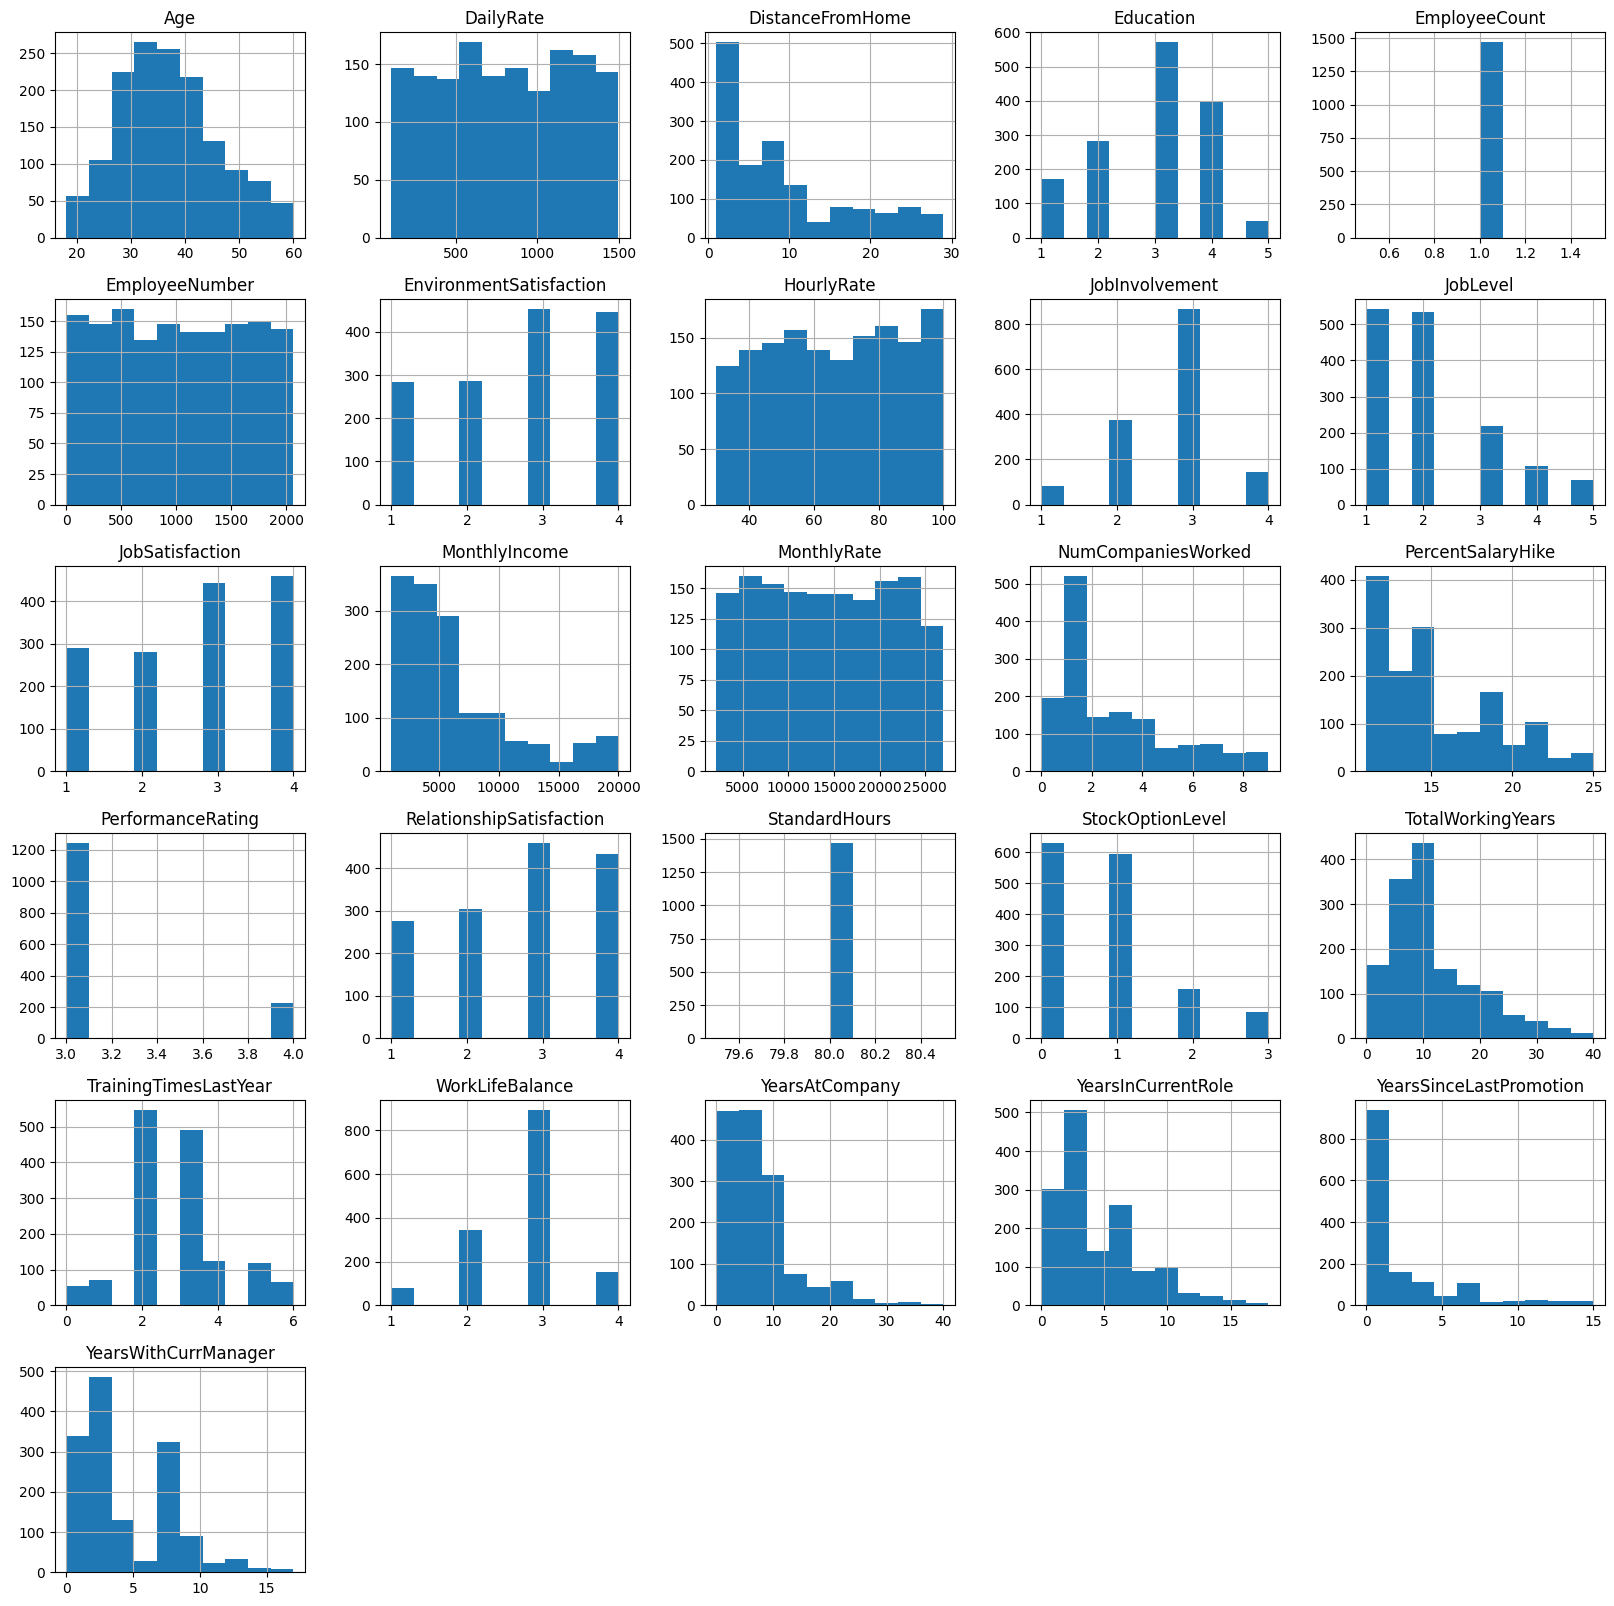

In [56]:
df.hist(figsize = (20,20))
plt.show()